In [1]:
import nbformat
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_ComplexStew/'

In [3]:
bscore=pd.read_csv('M_BDScore.csv')

In [4]:
bscore

,Participant,Block Design Raw Score
0,C002,28
1,C004,30
2,C005,46
3,C010,54
4,C011,34
5,C014,32
6,C015,33
7,C018,50
8,C019,40
9,C022,32


In [5]:
final_df=pd.read_csv('PositionDistance_ComplexStew.csv')

In [6]:
final_df = pd.merge(bscore, final_df, on='Participant', how='inner')
final_df

,Participant,Block Design Raw Score,Chest,HeadCamera,LeftElbow,LeftShoulder,MotionControllerLeft,MotionControllerRight,RightElbow,RightShoulder
0,C002,28,3204.066141,4673.310178,2980.379981,3149.831729,3925.430860,17259.208604,14006.698183,8647.907569
1,C004,30,2836.300561,5411.832758,8191.224968,7108.797399,11956.925071,9205.327224,5604.074989,5133.590254
2,C005,46,10539.595320,13065.897281,10215.473433,11062.715877,12582.395922,21996.871609,13598.045673,13520.227658
3,C010,54,1793.123521,1893.995601,2538.035150,2245.934665,2928.781839,4733.746639,3350.003130,2640.860411
4,C011,34,4050.538997,4786.556109,6095.937754,5128.255280,7368.995911,13299.942287,8518.602496,6479.545112
5,C014,32,4973.936621,6028.289712,6796.033200,6214.696710,7591.382218,15144.486600,11593.240494,9524.565936
6,C015,33,7321.705980,9195.631796,10355.253717,9531.107151,10771.533045,22361.696808,17257.506265,12847.732522
7,C018,50,3278.754839,4263.423725,4815.631482,4005.065979,6542.016552,10215.028963,7051.163868,5527.008737
8,C019,40,3145.024030,4478.292426,3391.126102,3281.582209,4376.936796,13280.100424,10453.141934,7320.194072
9,C022,32,3408.740260,4343.240819,4916.747164,4590.815735,5278.099917,11001.978297,7552.145704,6045.832878


#### Scatter plot between block design scores and total distance (Trackers)

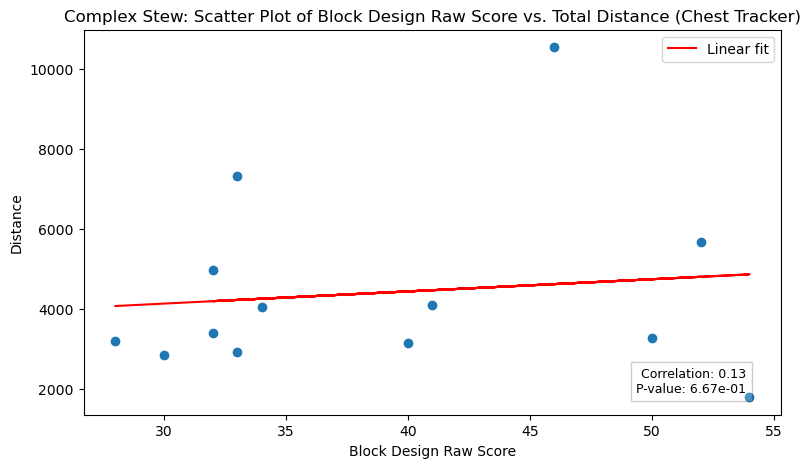

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

chest_df = final_df[final_df['Chest'] != 0]
correlation, p_value = spearmanr(chest_df['Block Design Raw Score'], chest_df['Chest'])
plt.figure(figsize=(9,5))
plt.scatter(chest_df['Block Design Raw Score'], chest_df['Chest'])

# Calculate linear fit
slope, intercept = np.polyfit(chest_df['Block Design Raw Score'], chest_df['Chest'], 1)
fit_line = slope * chest_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(chest_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. Total Distance (Chest Tracker)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '1 CS_DistanceChest.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

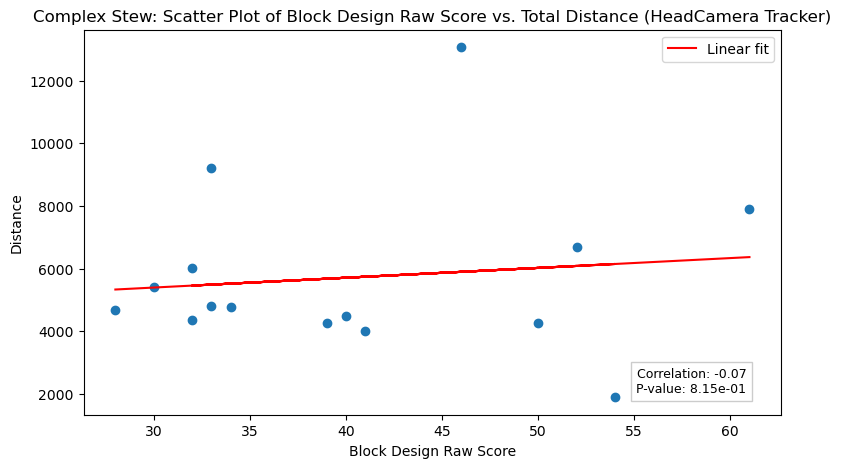

In [8]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['HeadCamera'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['HeadCamera'])

slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['HeadCamera'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')
plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. Total Distance (HeadCamera Tracker)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '2 CS_DistanceHeadCam.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

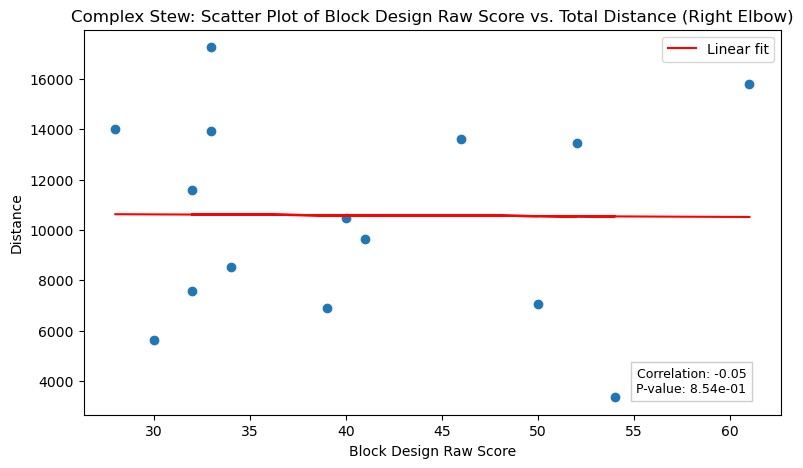

In [9]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['RightElbow'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['RightElbow'])


slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['RightElbow'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')
plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. Total Distance (Right Elbow)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '3 CS_DistanceRightElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

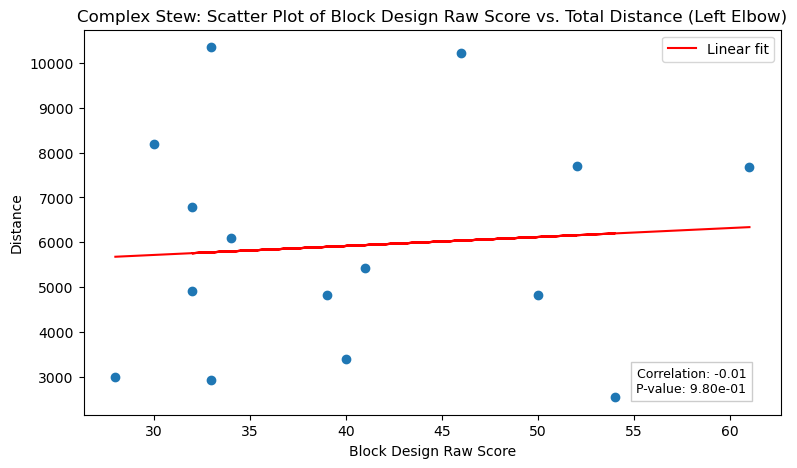

In [10]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['LeftElbow'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['LeftElbow'])


slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['LeftElbow'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')
plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. Total Distance (Left Elbow)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '4 CS_DistanceLeftElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

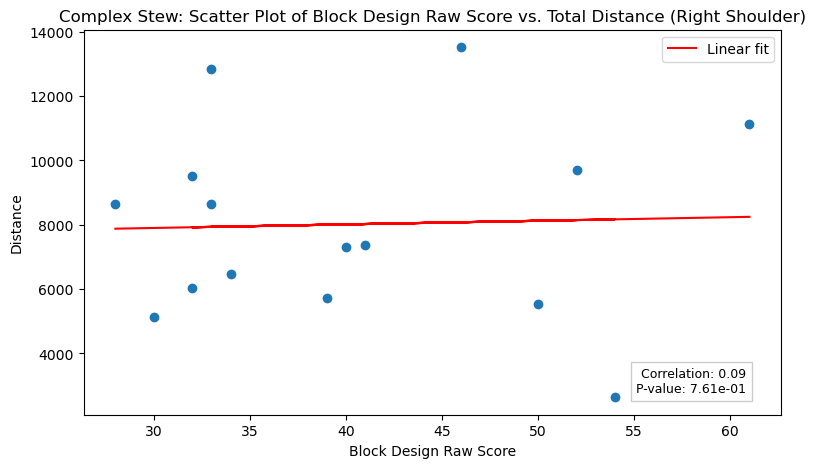

In [11]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['RightShoulder'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['RightShoulder'])


slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['RightShoulder'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')
plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. Total Distance (Right Shoulder)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '5 CS_DistanceRightShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

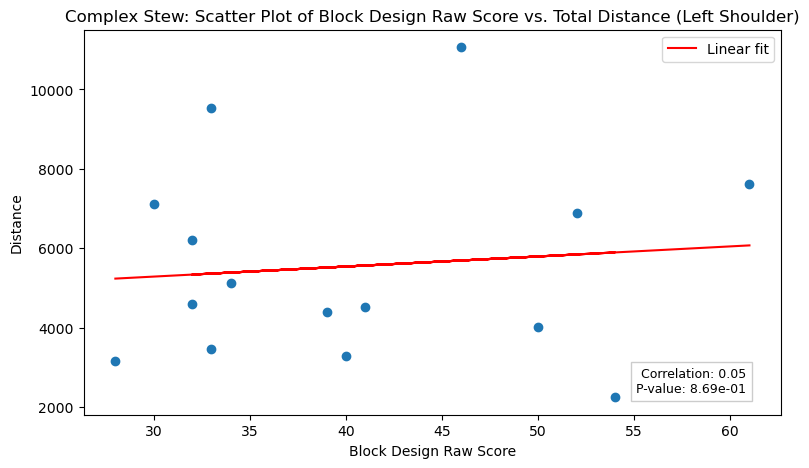

In [12]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['LeftShoulder'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['LeftShoulder'])


slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['LeftShoulder'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')
plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. Total Distance (Left Shoulder)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '6 CS_DistanceLeftShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

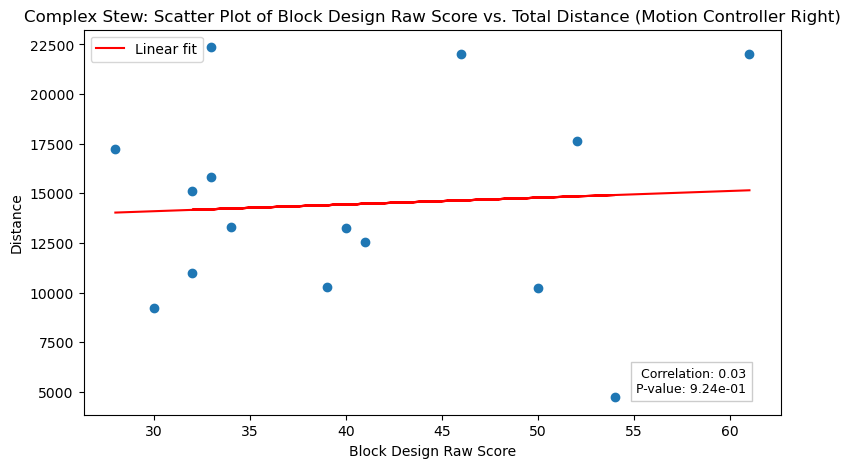

In [13]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['MotionControllerRight'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['MotionControllerRight'])

slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['MotionControllerRight'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')
plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. Total Distance (Motion Controller Right)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '7 CS_DistanceMotionContRight.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

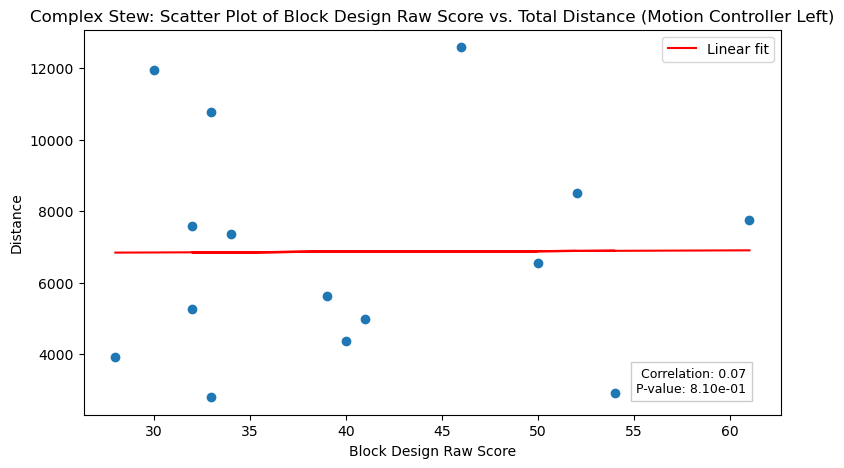

In [14]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['MotionControllerLeft'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['MotionControllerLeft'])

slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['MotionControllerLeft'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')
plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. Total Distance (Motion Controller Left)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '8 CS_DistanceMotionContLeft.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

In [16]:
def extract_dataframe(file_path):
    with open(file_path, 'r') as file:
        nb = nbformat.read(file, as_version=4)
        
    local_context = {}
    for cell in nb.cells:
        if cell.cell_type == 'code':
            try:
                exec(cell.source, {}, local_context)
                if 'combined_pivot_df' in local_context:
                    return local_context['combined_pivot_df']
            except Exception as e:
                print(f"Error executing cell in {file_path}: {e}")
    return None

# List to store dataframes from each notebook
dataframes = []

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_ComplexStew/'
file_pattern = directory + '*_Movement.ipynb'

# Extract data from each notebook
for file_path in glob.glob(file_pattern):
    participant_id = os.path.basename(file_path)[:4]  # Extract the first 4 characters of the filename
    df = extract_dataframe(file_path)
    if df is not None:
        df['Participant'] = participant_id  # Add a new column for Participant ID
        dataframes.append(df)

# Combine all dataframes into a single dataframe
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df

Tracker,Step,Chest Euclidean Distance,HeadCamera Euclidean Distance,LeftElbow Euclidean Distance,LeftShoulder Euclidean Distance,MotionControllerLeft Euclidean Distance,MotionControllerRight Euclidean Distance,RightElbow Euclidean Distance,RightShoulder Euclidean Distance,Participant
0,Add Beef,540.634569,871.385365,616.627310,551.960792,870.054407,3283.678374,2454.728468,1567.848626,C002
1,Add Carrot,489.520823,696.793809,443.371566,438.114497,587.927154,3007.709395,2211.665362,1453.483221,C002
2,Add Onion,332.113683,512.237343,376.378395,350.768673,539.646414,1903.179597,1409.049354,930.640024,C002
3,Add Potato,453.844752,635.018948,375.957419,386.269085,571.402766,2683.256847,2070.015822,1347.778456,C002
4,Add Salt,67.308152,100.695676,43.811099,65.168178,32.539116,462.475969,304.934364,243.129160,C002
...,...,...,...,...,...,...,...,...,...,...
118,Add Tomtato,0.000000,635.167438,548.435997,579.916351,492.380788,1830.373445,1284.401408,884.655523,C031
119,Add pepper,0.000000,100.024540,58.999478,65.314083,82.846660,352.988484,322.061794,201.602226,C031
120,Post last step,0.000000,405.719186,412.399272,375.476437,435.038866,1151.216163,807.262203,543.612792,C031
121,Pour Broth,0.000000,2148.540098,2298.817658,2170.840187,2575.201670,3188.117916,2396.057172,2058.860757,C031


In [17]:
final_df = pd.merge(bscore, combined_df, on='Participant', how='inner')
final_df

,Participant,Block Design Raw Score,Step,Chest Euclidean Distance,HeadCamera Euclidean Distance,LeftElbow Euclidean Distance,LeftShoulder Euclidean Distance,MotionControllerLeft Euclidean Distance,MotionControllerRight Euclidean Distance,RightElbow Euclidean Distance,RightShoulder Euclidean Distance
0,C002,28,Add Beef,540.634569,871.385365,616.627310,551.960792,870.054407,3283.678374,2454.728468,1567.848626
1,C002,28,Add Carrot,489.520823,696.793809,443.371566,438.114497,587.927154,3007.709395,2211.665362,1453.483221
2,C002,28,Add Onion,332.113683,512.237343,376.378395,350.768673,539.646414,1903.179597,1409.049354,930.640024
3,C002,28,Add Potato,453.844752,635.018948,375.957419,386.269085,571.402766,2683.256847,2070.015822,1347.778456
4,C002,28,Add Salt,67.308152,100.695676,43.811099,65.168178,32.539116,462.475969,304.934364,243.129160
...,...,...,...,...,...,...,...,...,...,...,...
118,C031,61,Add Tomtato,0.000000,635.167438,548.435997,579.916351,492.380788,1830.373445,1284.401408,884.655523
119,C031,61,Add pepper,0.000000,100.024540,58.999478,65.314083,82.846660,352.988484,322.061794,201.602226
120,C031,61,Post last step,0.000000,405.719186,412.399272,375.476437,435.038866,1151.216163,807.262203,543.612792
121,C031,61,Pour Broth,0.000000,2148.540098,2298.817658,2170.840187,2575.201670,3188.117916,2396.057172,2058.860757


In [18]:
column_rename = {
    'Chest Euclidean Distance': 'Chest Distance',
    'HeadCamera Euclidean Distance': 'HeadCamera Distance',
    'LeftElbow Euclidean Distance': 'LeftElbow Distance',
    'LeftShoulder Euclidean Distance': 'LeftShoulder Distance',
    'MotionControllerLeft Euclidean Distance': 'MotionControllerLeft Distance',
    'MotionControllerRight Euclidean Distance': 'MotionControllerRight Distance',
    'RightElbow Euclidean Distance': 'RightElbow Distance',
    'RightShoulder Euclidean Distance': 'RightShoulder Distance'
}

final_df = final_df.rename(columns=column_rename)
final_df

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
0,C002,28,Add Beef,540.634569,871.385365,616.627310,551.960792,870.054407,3283.678374,2454.728468,1567.848626
1,C002,28,Add Carrot,489.520823,696.793809,443.371566,438.114497,587.927154,3007.709395,2211.665362,1453.483221
2,C002,28,Add Onion,332.113683,512.237343,376.378395,350.768673,539.646414,1903.179597,1409.049354,930.640024
3,C002,28,Add Potato,453.844752,635.018948,375.957419,386.269085,571.402766,2683.256847,2070.015822,1347.778456
4,C002,28,Add Salt,67.308152,100.695676,43.811099,65.168178,32.539116,462.475969,304.934364,243.129160
...,...,...,...,...,...,...,...,...,...,...,...
118,C031,61,Add Tomtato,0.000000,635.167438,548.435997,579.916351,492.380788,1830.373445,1284.401408,884.655523
119,C031,61,Add pepper,0.000000,100.024540,58.999478,65.314083,82.846660,352.988484,322.061794,201.602226
120,C031,61,Post last step,0.000000,405.719186,412.399272,375.476437,435.038866,1151.216163,807.262203,543.612792
121,C031,61,Pour Broth,0.000000,2148.540098,2298.817658,2170.840187,2575.201670,3188.117916,2396.057172,2058.860757


In [19]:
#final_df.to_csv('ComplexStew_MS_PerStep.csv',index=False)